In [7]:
!pip install -q pylatexenc
!pip install -q qiskit
!pip install -q qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.9 MB/s eta 0:00:00


# 1. Wstęp

## Argumenty za wyłączeniem chmurowych symulatorów kwantowych

Do 15 maja 2024 r. IBM Quantum udostępniał symulatory kwantowe w chmurze. Wyłączenie symulatorów w chmurze argumentowane jest następująco:
1. Ograniczenia symulatorów do badań (ang. *research*) lub eksperymentów.
    1. Przy wykorzystaniu nawet najnowczoeśniejszych komputerów klasycznych, pozwalają na symulowanie działanie systemów kwantowach do ok. 50 kubitów. Ograniczenie to wynika z wykładniczego wzrostu zapotrzebowania na moc obliczeniową przy symulacji większych systemów kwantowych.
    1. Symulatory nie potrafią uchwycić szumów (ang. *noise*) i błędów (ang. *error*)  w modelach
1. Zbudowanie nowych umiejętności
    1. Konieczność stosowania strategii ograniczania błędów
    1. Rozumienie zjawisk kwantowych
    1. Zwiększenie kreatywności i innowacyjności poprzez używanie prawdziwych komputerów kwantowych
1. Dostosowanie algorytmów do sprzętu kwantowego
    1. Sprzęt kwantowy pozwala na wykrozystanie możliwości systemów kwantowych
    1. Parametryzacja Ansatz-u, topologii obwodów w celu maksymalizacji wydajności poprzez eksperymenty na sprzęcie kwantowym


## Konieczność migracji do symulatorów na komputerach lokalnych

Korzystanie z symulatorów lokalnych wymaga:

1. Określenia sztucznego backendu *fake backend* poleceniem `qiskit_ibm_runtime.fake_provider` lub
1. Określenia backendu w `Qiskit Aer` przed rozpoczęciem sesji lub inicjalizacją pierwszego obiektu

### Fake backend

Sztuczne backendy naśladują zachowanie systemów kwantowych IBM wykorzystując migawki systemu (ang. *system snapshots*). Informacje o stanie systemu takie jak graf mapy powiązań (ang. *coupling map*), podstawowe bramki, własności kubitów. Podczas symulacji z wykorzystaniem takiego backendu dodawany jest model szumów.

### Aer simulator

Symulatory `Qiskit Aer` mogą obsługiwać złożone obwody oraz realistyczne modele szumów. Dostarczają intefejsu do eksperymentów z obwodami kwantowymi z uwzględnieniem szumó lub bez nich. Pozwalają na wykorzystanie interfejsów *Message Passing Interface* (MPI). `Qiskit Aer` jest zależny od wersji głównego pakietu `Qiskit` oraz wykorzystywanej platformy. https://qiskit.github.io/qiskit-aer/

# 2. Informacje o Qiskit v.1.0

W wersji v.1.0 systemy kwantowe mogą być symulowane albo na komputerze lokalnym albo wykonywane na rzeczywistym sprzęcie kwantowym w chmurze IBM.

<img src="https://github.com/bojaruniec/ksi_dokt/blob/master/qiskit_environment.png?raw=1" alt="Środowisko Qiskit v.1.0" title="Środowisko Qiskit v.1.0" style="width:70%;" />

Źródło: __[Using Qiskit v1.x | Part 1 - Overview](https://www.youtube.com/watch?v=KmMS0S6BMao)__ .

<TABLE>
<THEAD>
<TR>
<TH>quantum_info</TH>
<TH>BasicSimulator</TH>
<TH>AerSimulator</TH>
<TR>
</THEAD>
<TBODY>


<TR>
<TD COLSPAN=3>Do wykorzystania</TD>
</TR>

<TR>
<TD>
<LI>Znalezeienie macierzy gęstości na końcu obwodu
<LI>Wyznaczenie prawdopodieństw wyniku
<LI>Wizualizacja stanu
<LI>Znalezeienie macierzy unitarnej
</TD>
<TD>
<LI>Wynik dla obwodu z wewnętrznym pomiarem
</TD>
<TD>
<LI>Duże obwody z dużą ilością kubitów
<LI>Znalezienie macierzy gęstości dal obwodu z pomiarami
<LI>Modelowanie szumu
</TD>
</TR>

<TR>
<TD COLSPAN=3>Nie zaleceane</TD>
</TR>


<TR>
<TD>
<LI>Duże obwody z dużą ilością kubitów i bramek
<LI>Obwody zawierają bity klasyczne
<LI>Wewnątrz obwodów dokonywany jest pomiar
</TD>
<TD>
<LI>Duże obwody z dużą ilością kubitów i bramek
<LI>Potrzeba znalezienia spójnych stanów
<LI>Potrzeba dodania szumu
</TD>
<TD>
<LI>Brak kompatybilnego formatu z Qiskit IBM runtime
<LI>Dostęp do starej wersji V1 obiektów
</TD>
</TR>

</TBODY>
</TABLE>

## 2.1 Moduł `quantum_info`

- Używany do analizy własności kwantowych wyniku obwodu kwantowego.
- Wykorzystuje przekształcenia algebraiczne

Dokumentacja: __https://docs.quantum.ibm.com/api/qiskit/quantum_info__ .

In [1]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

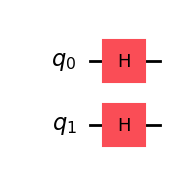

In [2]:
qc = QuantumCircuit(2)  # dwa kubity
qc.h([0,1])             # bramka Hadamrada na kubicie nr 0 i kubicie nr 1
qc.draw('mpl')          # wyświetlenie za pomocą pakietu matplotlib

Alaliza obiektu klasy `Statevector`

In [3]:
ψ = qi.Statevector(qc)

In [4]:
print(type(ψ))

<class 'qiskit.quantum_info.states.statevector.Statevector'>


Obiekt typu `Statevector` posiada dodatkowo szereg metod, które zostaną zaprezentowane poniżej.

### 2.1.1. Prawdopodobieństwa dla każdego ze stanów:

In [5]:
print('Słownik:')
print(ψ.probabilities_dict(decimals=2))
print('')
print('Lista:')
print(ψ.probabilities(decimals=2))

Słownik:
{'00': 0.25, '01': 0.25, '10': 0.25, '11': 0.25}

Lista:
[0.25 0.25 0.25 0.25]


### 2.1.2. Graficzna reprezentacja

In [ ]:
ψ.draw('latex')

<IPython.core.display.Latex object>

### 2.1.3. Przeprowadzenie symulacji dla zadanej liczby próbek

In [ ]:
counts = ψ.sample_counts(shots=1024)
print(counts)

{'00': 235, '01': 272, '10': 252, '11': 265}


### 2.1.4. Histogram

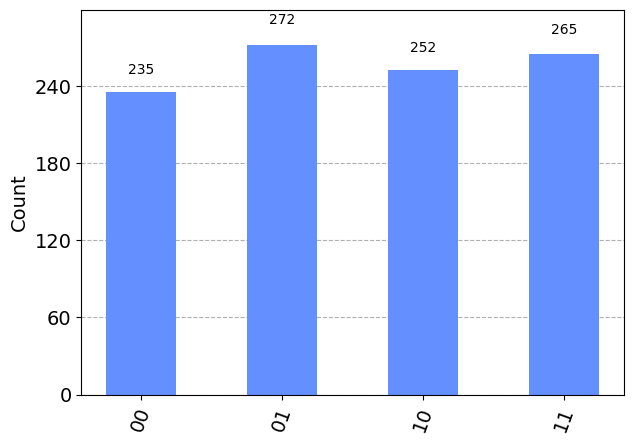

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### 2.1.5 Wynik symulacji dla każdej próby

In [ ]:
samples = ψ.sample_memory(shots=1024)
print(samples)

['00' '11' '00' ... '00' '01' '01']


Wykorzystując standardową funkcją `Counter` z biblioteki `collections` zwróci podobne wyniki jak `sample_counts()`, ale klucze w słowniku wynikowym będą w innej kolejności.


In [ ]:
from collections import Counter
print(Counter(samples))

Counter({'10': 270, '01': 260, '00': 256, '11': 238})


### 2.1.6 Sfera Blocha
Obraz Matplotlib dla obiektu typu statevector z wykorzystaniem metody plot_bloch_multivector().

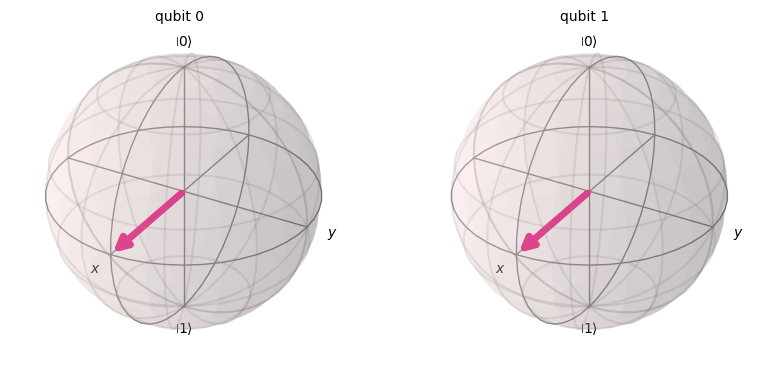

In [ ]:
ψ.draw('bloch')

### 2.1.7 Histogram typut `city`

Generuje dwa trójwymiarowe wykresy słupkowy (względem dwóch wymiarów) części rzeczywistej i urojonej danej macierzy gęstości.

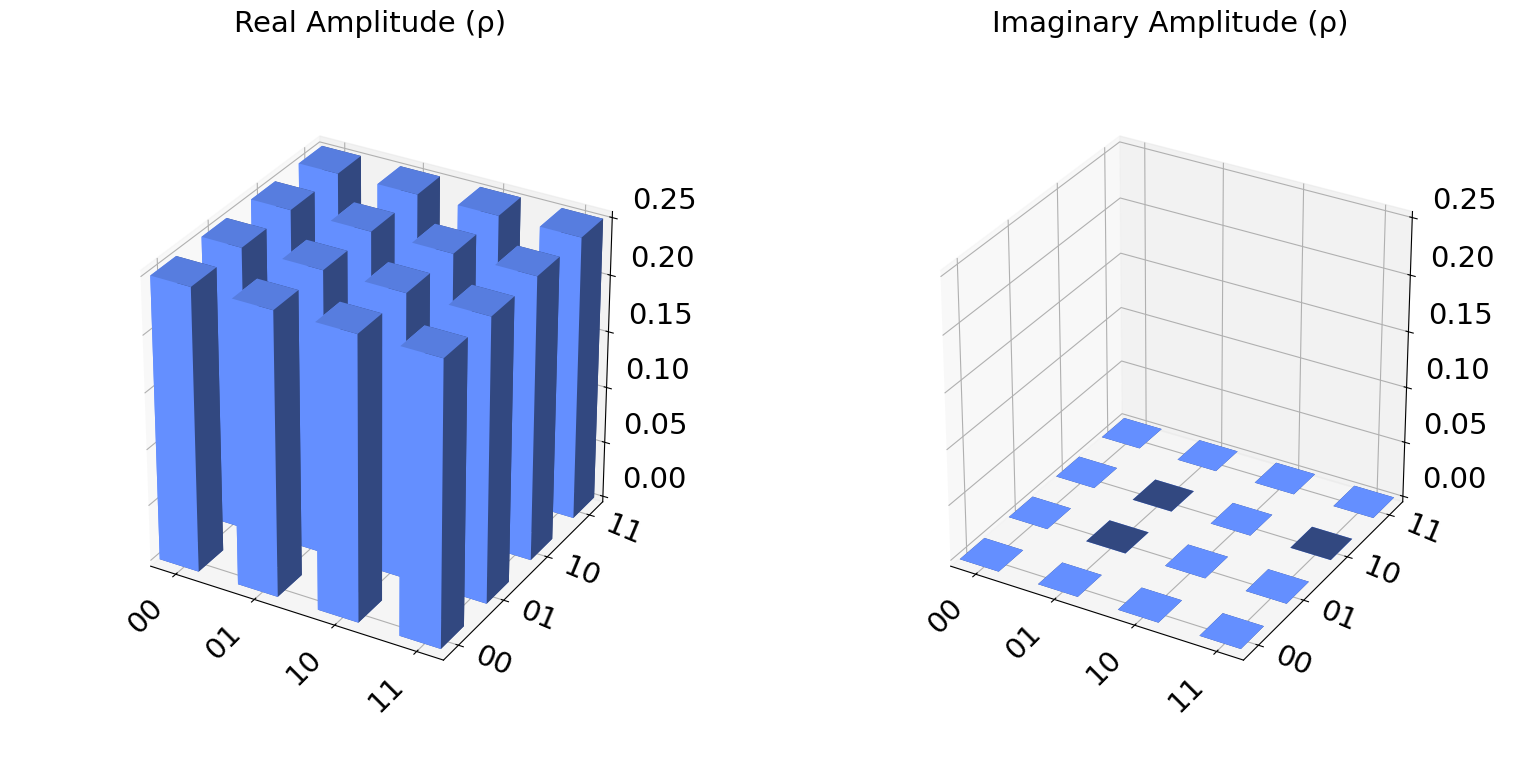

In [ ]:
ψ.draw('city')

### 2.1.8 Wykres typu `paulivec`

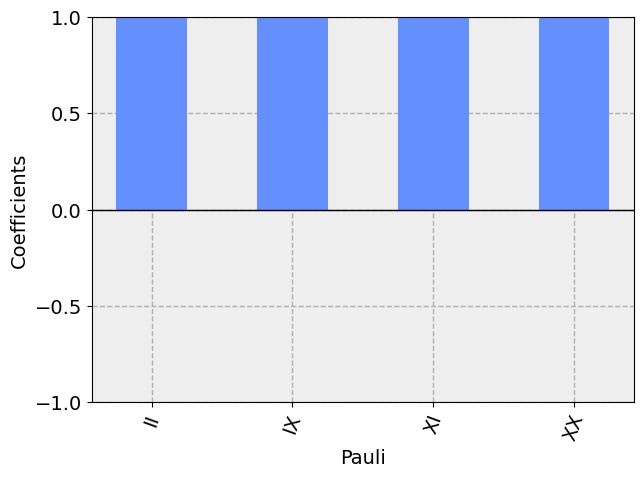

In [ ]:
ψ.draw('paulivec')

### 2.1.9 Wykres typu `hinton`

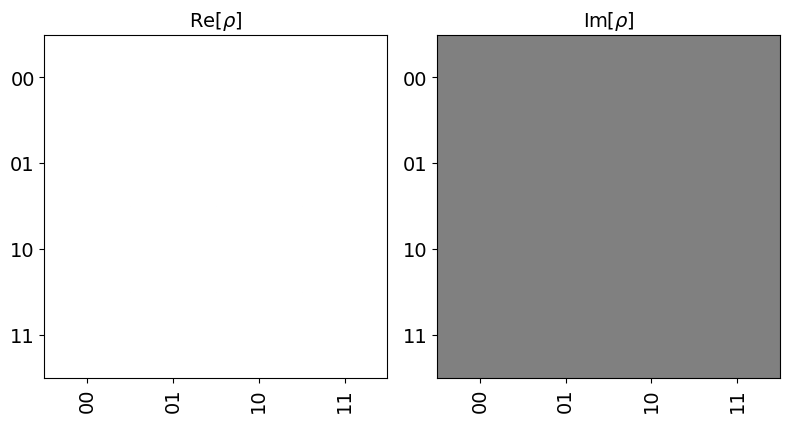

In [ ]:
ψ.draw('hinton')

### 2.1.9 Wykres typu `qsphere`

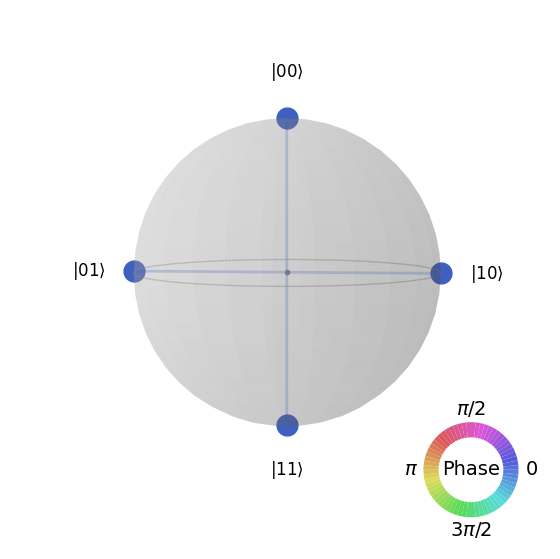

In [ ]:
ψ.draw('qsphere')

### 2.1.10 Macierz unitarna  

In [ ]:
U = qi.Operator(qc)
U.draw('latex')

<IPython.core.display.Latex object>

## 2.2. BasciSimulator

- pozwala na zaimplementwoanie obwodó z pomiarami wewnątrz
- nie jest wydajny

In [9]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic = BasicSimulator()

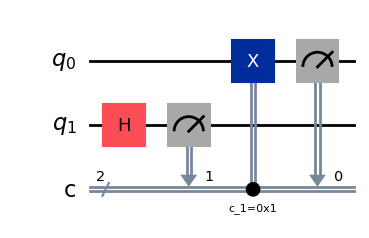

In [10]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1,)
qc.x(0).c_if(1,1)
qc.measure(0,0)
qc.draw('mpl')

Uruchomienie symulatora odbywa się poporzez uruchomienie komendy run, gdzie pierwszym jest obwód, zaś drugim liczba próbek.

In [11]:
job = simulator_basic.run(qc, shots = 1024)
result = job.result()


In [12]:
counts = result.get_counts()
print(counts)

{'00': 480, '11': 544}


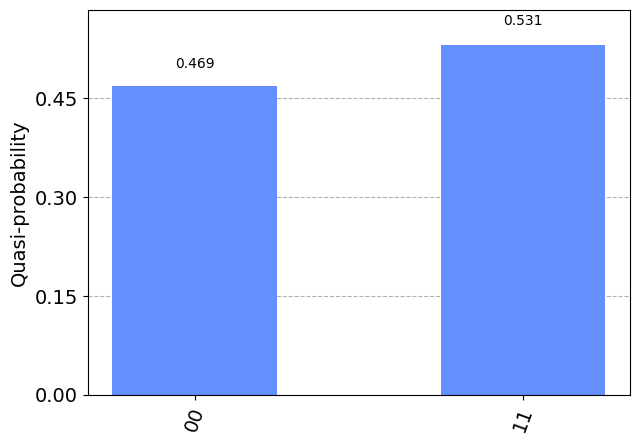

In [13]:
from qiskit.visualization import plot_histogram, plot_distribution
plot_distribution(counts)

In [14]:
job = simulator_basic.run(qc, shots = 1024, memory= True)
result = job.result()
samples = result.get_memory()

In [15]:
print(samples)

['00', '11', '00', '00', '11', '11', '00', '00', '00', '11', '11', '11', '11', '00', '11', '00', '00', '11', '00', '11', '00', '11', '11', '11', '11', '00', '11', '00', '00', '00', '00', '00', '11', '00', '00', '11', '00', '11', '11', '00', '11', '11', '00', '00', '00', '11', '00', '00', '00', '00', '11', '00', '11', '00', '11', '11', '00', '11', '11', '11', '11', '00', '11', '00', '00', '00', '00', '11', '11', '11', '00', '00', '11', '11', '00', '11', '00', '11', '00', '11', '11', '00', '11', '11', '11', '00', '11', '00', '00', '00', '11', '00', '11', '00', '00', '11', '00', '11', '11', '11', '11', '00', '11', '11', '11', '11', '00', '00', '11', '11', '00', '11', '11', '00', '00', '11', '00', '00', '00', '11', '00', '11', '00', '11', '11', '11', '11', '00', '00', '00', '00', '00', '00', '00', '11', '00', '00', '00', '00', '11', '00', '11', '00', '00', '00', '00', '11', '11', '00', '00', '00', '11', '11', '00', '11', '11', '11', '00', '00', '00', '11', '00', '00', '00', '11', '11', '11

### Przykład dla Qubit Fourier Transofrm - problem tanspilacji

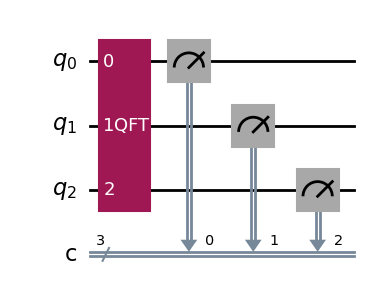

In [16]:
from qiskit.circuit.library import QFT
qc = QuantumCircuit(3,3)
qc.append(QFT(3), range(3))
qc.measure(range(3), range(3))
qc.draw('mpl')

In [17]:
job = simulator_basic.run(qc, shots = 1024, memory= True)
result = job.result()
samples = result.get_memory()

BasicProviderError: 'basic_simulator encountered unrecognized operation "QFT"'

Powinniśmy transpilować kod na bramk, kótre są dostępne w danym backendzie.

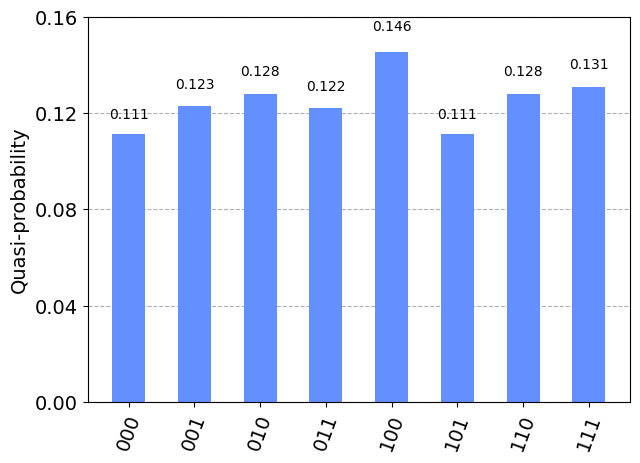

In [18]:
from qiskit import transpile
qc_t = transpile(qc, backend = simulator_basic)

job = simulator_basic.run(qc_t, shots = 1024, memory= True)
result = job.result()
counts = result.get_counts()
samples = result.get_memory()
plot_distribution(counts)

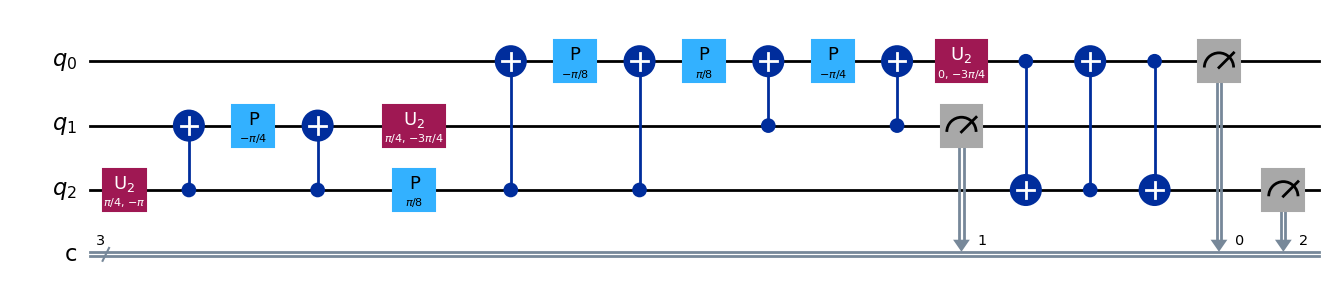

In [19]:
qc_t.draw('mpl')


## 2.3. Qiskit Aer

- opracowany w C++
- posiada dodatkowe funkcjonalności nieobecne w symulatorze podstawowym

In [20]:
from qiskit_aer import AerSimulator

simulator_basic = BasicSimulator()
simulator_aer = AerSimulator()

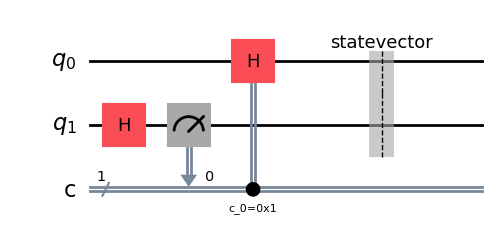

In [23]:
qc = QuantumCircuit(2,1)
qc.h(1)
qc.measure(1,0)
qc.h(0).c_if(0,1)
qc.save_statevector()b
qc.draw('mpl')

In [27]:
qc_basic = transpile(qc, backend = simulator_basic)
qc_basic.draw('mpl')

result = simulator_aer.run(qc_basic, shots=1024).result()
counts = resutl.get_counts()
print(counts)

TranspilerError: "Unable to translate the operations in the circuit: ['h', 'save_statevector', 'measure'] to the backend's (or manually specified) target basis: ['u', 'h', 'rz', 'unitary', 'x', 'cx', 'measure', 'delay', 'u2', 'u3', 'p', 'sx', 'reset', 'barrier', 'snapshot', 'u1', 'id']. This likely means the target basis is not universal or there are additional equivalence rules needed in the EquivalenceLibrary being used. For more details on this error see: https://docs.quantum.ibm.com/api/qiskit/transpiler_passes.BasisTranslator#translation-errors"

In [31]:
qc_aer = transpile(qc, backend = simulator_aer)
qc_aer.draw('mpl')

result = simulator_aer.run(qc_aer).result()
ψ = result.get_statevector()
ψ.draw('latex')


<IPython.core.display.Latex object>

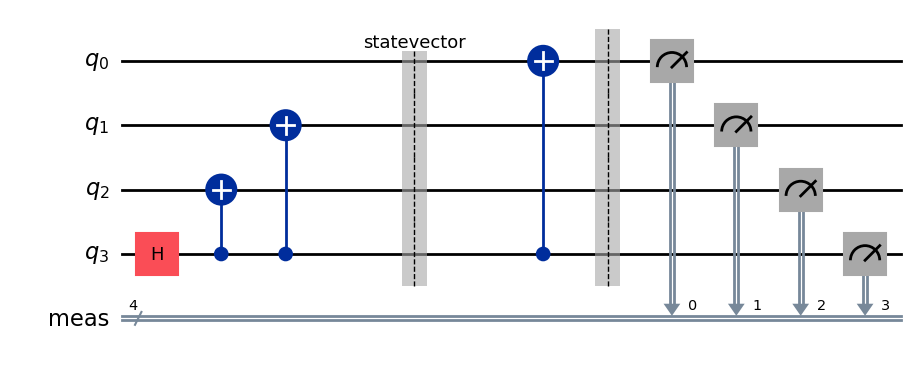

In [38]:
qc = QuantumCircuit(4)
qc.h(3)
qc.cx(3,2)
qc.cx(3,1)
qc.save_statevector()
qc.cx(3,0)
qc.measure_all()
qc.draw('mpl')

In [39]:
qc_aer = transpile(qc, backend = simulator_aer)
qc_aer.draw('mpl')

result = simulator_aer.run(qc_aer).result()
ψ = result.get_statevector()
ψ.draw('latex')

<IPython.core.display.Latex object>

### 2.2.2 Efektywność symulatora

Zostanie utworzony duży obwód z 24 kubitami

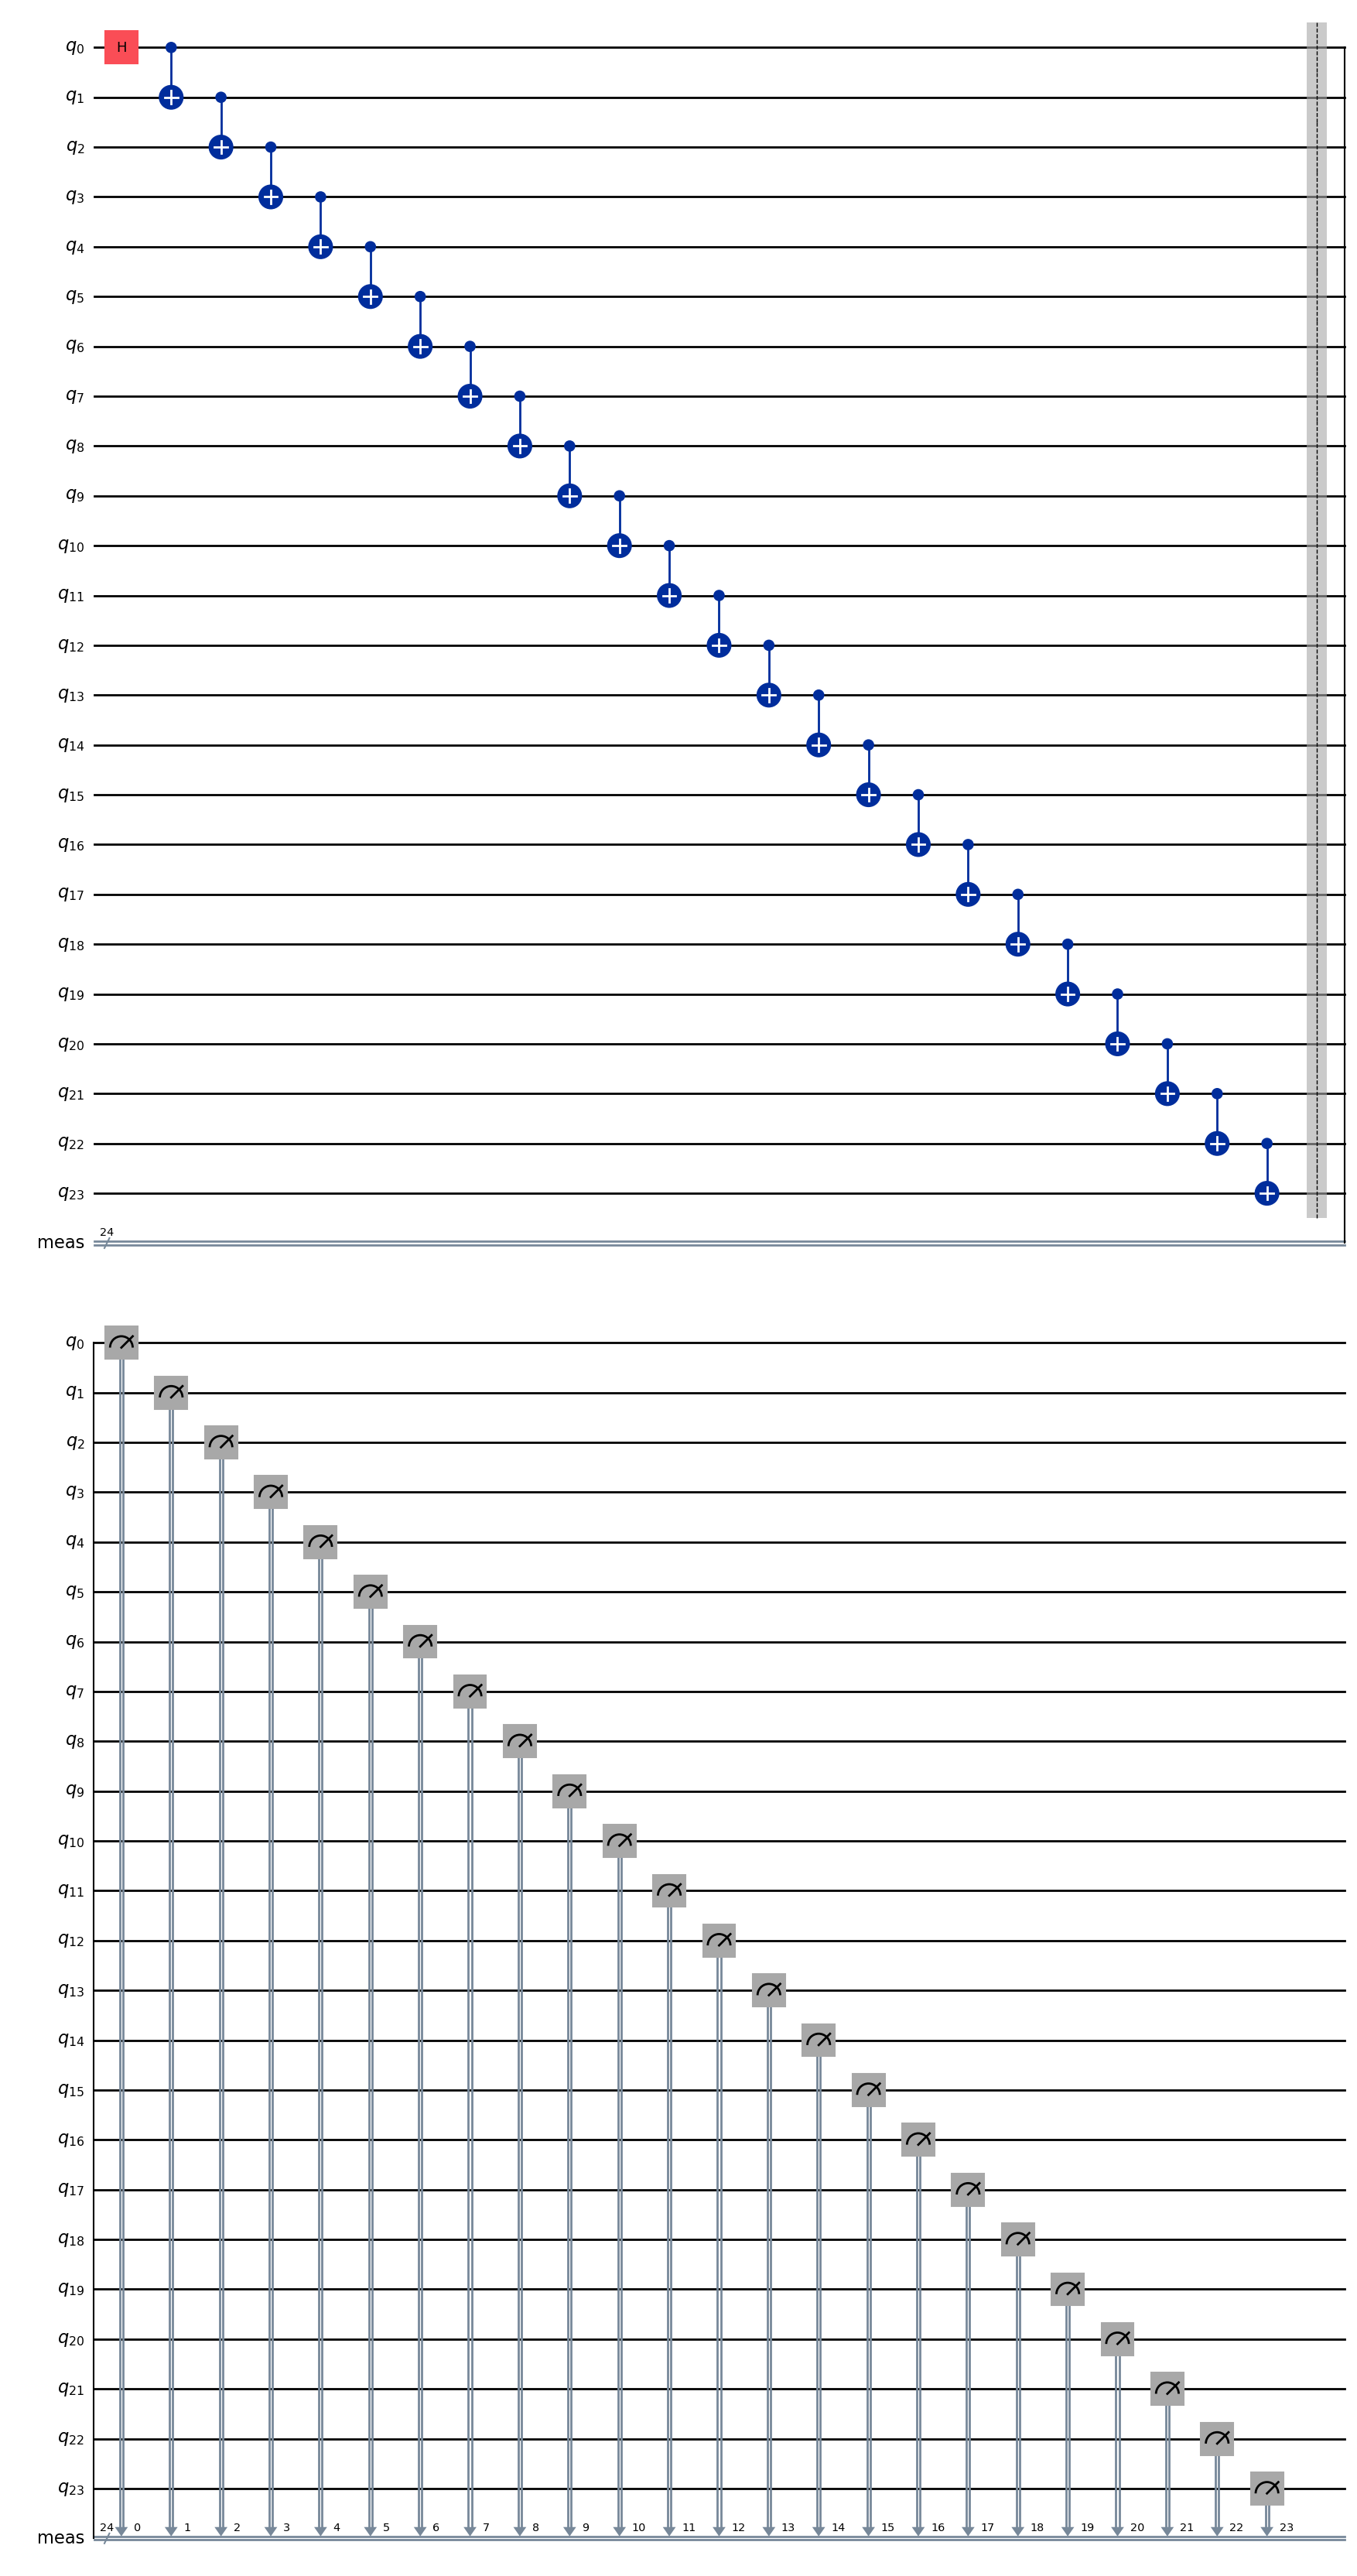

In [42]:
n = 24
qc = QuantumCircuit(n)
qc.h(0)
for i in range(1,n,1):
  qc.cx(i-1,i)

qc.measure_abll()
qc.draw('mpl')

In [43]:
%%time

result = simulator_basic.run(qc, shots = 1024).result()
print(counts)

{'100': 149, '011': 125, '110': 131, '101': 114, '000': 114, '111': 134, '001': 126, '010': 131}
CPU times: user 15.5 s, sys: 5.17 s, total: 20.7 s
Wall time: 25.5 s


In [51]:
%%time

result = simulator_aer.run(qc, shots = 1024,).result()
print(counts)

{'100': 149, '011': 125, '110': 131, '101': 114, '000': 114, '111': 134, '001': 126, '010': 131}
CPU times: user 40.9 ms, sys: 0 ns, total: 40.9 ms
Wall time: 62.7 ms


In [50]:
%%time

result = simulator_aer.run(qc, shots = 1024, method='automatic').result()
print(counts)

{'100': 149, '011': 125, '110': 131, '101': 114, '000': 114, '111': 134, '001': 126, '010': 131}
CPU times: user 48.7 ms, sys: 186 µs, total: 48.9 ms
Wall time: 62.3 ms


In [45]:
%%time

result = simulator_aer.run(qc, shots = 1024, method = 'statevector').result()
print(counts)

{'100': 149, '011': 125, '110': 131, '101': 114, '000': 114, '111': 134, '001': 126, '010': 131}
CPU times: user 6.85 s, sys: 294 ms, total: 7.14 s
Wall time: 5.84 s


In [47]:
%%time

result = simulator_aer.run(qc, shots = 1024, method = 'extended_stabilizer').result()
print(counts)

{'100': 149, '011': 125, '110': 131, '101': 114, '000': 114, '111': 134, '001': 126, '010': 131}
CPU times: user 12.3 ms, sys: 0 ns, total: 12.3 ms
Wall time: 30.2 ms


In [48]:
%%time

result = simulator_aer.run(qc, shots = 1024, method = 'matrix_product_state').result()
print(counts)

{'100': 149, '011': 125, '110': 131, '101': 114, '000': 114, '111': 134, '001': 126, '010': 131}
CPU times: user 201 ms, sys: 1.63 ms, total: 203 ms
Wall time: 435 ms


dla 250 kubitów

In [58]:
n = 250
qc = QuantumCircuit(n)
qc.h(0)
for i in range(1,n,1):
  qc.cx(i-1,i)

qc.measure_all()
# qc.draw('mpl')

In [59]:
%%time

result = simulator_basic.run(qc, shots = 1024).result()
print(counts)

BasicProviderError: 'Number of qubits 250 is greater than maximum (24) for "basic_simulator".'

In [60]:
%%time

result = simulator_aer.run(qc, shots = 1024, method = 'statevector').result()
print(counts)

ERROR:  [Experiment 0] Insufficient memory to run circuit circuit-197 using the statevector simulator. Required memory: 18446744073709551615M, max memory: 12978M


{'100': 149, '011': 125, '110': 131, '101': 114, '000': 114, '111': 134, '001': 126, '010': 131}
CPU times: user 18.8 ms, sys: 0 ns, total: 18.8 ms
Wall time: 20.4 ms


In [61]:
%%time

result = simulator_aer.run(qc, shots = 1024, method = 'matrix_product_state').result()
print(counts)

{'100': 149, '011': 125, '110': 131, '101': 114, '000': 114, '111': 134, '001': 126, '010': 131}
CPU times: user 2.28 s, sys: 20.2 ms, total: 2.3 s
Wall time: 1.21 s


### 2.2.3 Dodanie szumu

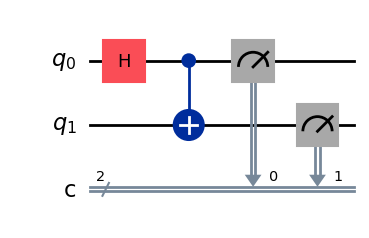

In [63]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw('mpl')

In [64]:
from qiskit_aer import noise

In [68]:
qc_aer = transpile(qc, backend=simulator_aer)
result_ideal = simulator_aer.run(qc_aer, shots=1024).result()
counts_ideal = result_ideal.get_counts()

In [71]:
prob = 0.1
error = noise.depolarizing_error(prob, 2)
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['cx'])
basis_gates = noise_model.basis_gates

result_noisy = simulator_aer.run(qc_aer, shots = 1024,
                                 noise_model=noise_model,
                                 basis_gates = basis_gates).result()
counts_noisy = result_noisy.get_counts()

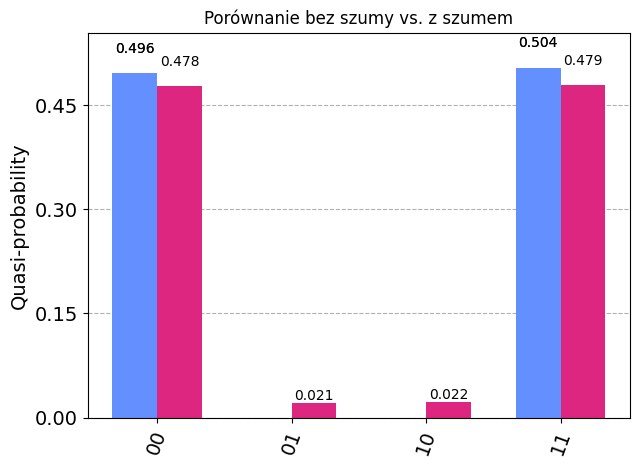

In [72]:
plot_distribution([counts_ideal, counts_noisy], title="Porównanie bez szumy vs. z szumem")

# 3. Przygotowanie środowiska

## 3.1. Sprawdzenie wersji zainstalowanych pakietów

In [6]:
import qiskit
import qiskit_aer

print(qiskit.__version__)
print(qiskit_aer.__version__)

ModuleNotFoundError: No module named 'qiskit_aer'

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes.
If it’s a note, you don’t have to include the word “Note”.
</div>